# Simple Line Plots

* 這章要來講怎麼畫出 $y = f(x)$ 圖形  
* 首先來做些畫圖前的設定 (這邊用 `seaborn-whitegrid` 的 style)

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

* 對於所有的 matplotlib plots，都是先建立 `figure` 和 `axis`  
* 我們可以建立最簡單的 figure 和 axis 如下

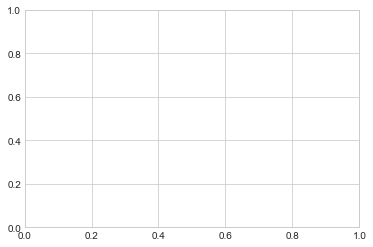

In [4]:
fig = plt.figure()
ax = plt.axes()

* 在 Matplotlib中， `figure` 是 an instance of the class `plt.Figure`，我們可以把 figure 想成一個容器，裡面包含 axes, graphics, text, labels...  
* `axes` 是 an instance of the class `plt.Axes`，也就是我們看到的，具有刻度(ticks)和標籤(label)的bounding box。最終，axes會包含我們畫上去的元素，組出我們要看到的視覺內容。(所以，我覺得 axes 根本就是一張圖的意思啊...)(axes是axis的複數，所以隱含多個軸的意思)  
* 一旦我們建立了一個 axes，我們就可以用 `axes.plot()`來畫圖。例如，來畫 sin 的圖形吧：

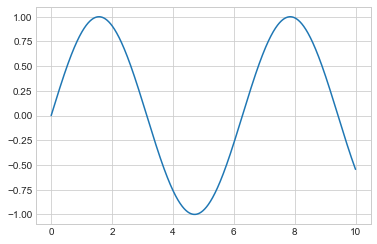

In [24]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

* 此外，我們也可以用 `pylab` 介面，讓 figure 和 axes 在背景中建立：

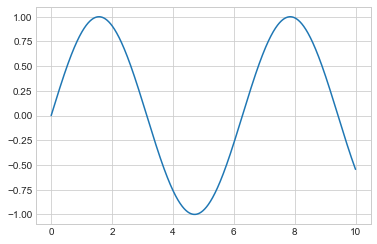

In [6]:
plt.plot(x, np.sin(x));

* 這邊注意一下，其實他在畫圖時，不是真的畫那個函數 ($y = sin(x)$)  
* 而是先生出 x 的點，再生出 y 的點，然後把這些 pair 點上去後，再用 line 連起來. 
* (之後學 scatter plot 後，就會發現，`plt.plot(x, y, "o")` 就是畫出 scatter plot，而這邊的 `plt.plot(x, y)` 會畫出線圖，是因為預設是 `plt.plot(x, y, "-")`，而 "-" 就是 line plot 的意思)  
* 所以，圖型的平滑程度，取決於 x 有多少個點，這邊就生了 1000 個點，來讓圖型平滑. 

* 如果要畫多個線條，就 call 多個 `plt.plot()` 就好  

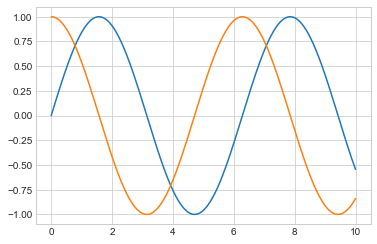

In [7]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

* 這大概就是 simple plot 該會的東西了. 
* 接下來要開始講 axes 和 lines 的一些細節

## 調整線條的 color 和 linestyle

* 調整 color 的部分，有以下這些方法：

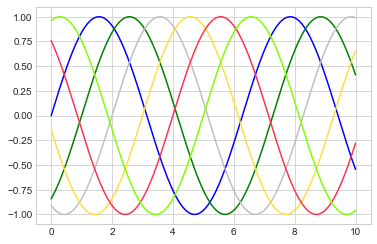

In [8]:
plt.plot(x, np.sin(x - 0), color='blue')        # 用 color name
plt.plot(x, np.sin(x - 1), color='g')           # 用 short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # 0 ~ 1 之間的灰階
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # 16 進位的 Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

* 調整 linestyle 的部分，有以下這些方法：

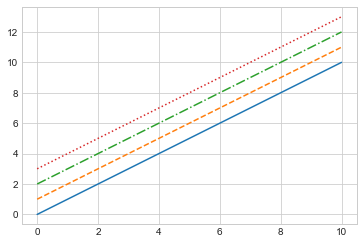

In [9]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

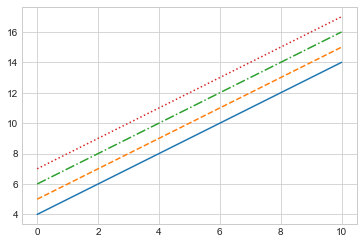

In [10]:
# 也可以用這種簡單的表示方式：
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

If you would like to be extremely terse, these ``linestyle`` and ``color`` codes can be combined into a single non-keyword argument to the ``plt.plot()`` function:

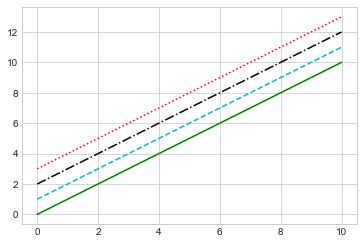

In [11]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

## 調整 Axes Limits

* 可以用 `plt.xlim()` and `plt.ylim()` methods:  

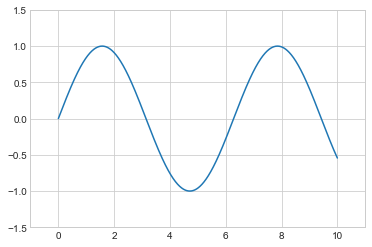

In [12]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

* 如果要把軸反轉(基於不知道啥的原因)，就把參數由大寫到小就好：

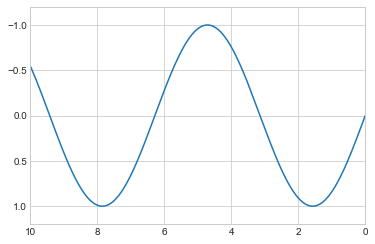

In [13]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

* 因為 axes 是 axis 的複數，所以也可以用 `plt.axes([xmin, xmax, ymin, ymax])` 的方式來設定兩個軸的 range

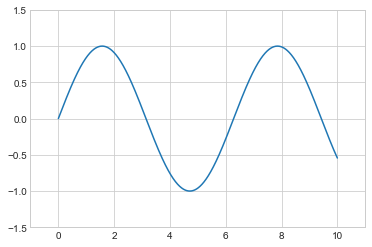

In [14]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

* `plt.axis()` (小心，是 axis，不是axes) 有一些高階參數，例如，讓圖形緊密(tight)一點：

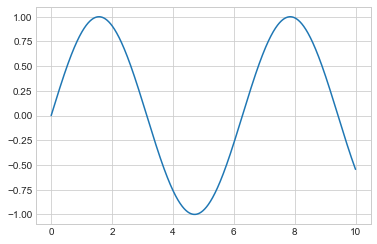

In [15]:
plt.plot(x, np.sin(x))
plt.axis('tight');

* 我們可以讓 x 和 y 的刻度一樣：

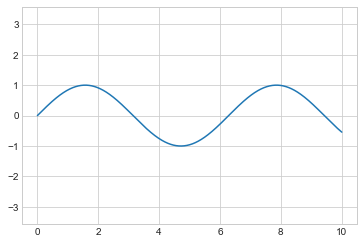

In [16]:
plt.plot(x, np.sin(x))
plt.axis('equal');

* 別忘了，可以用 `plt.axis?` 來查詢更細節的用法

In [17]:
plt.axis?

Signature: plt.axis(*args, emit=True, **kwargs)
Docstring:
Convenience method to get or set some axis properties.

Call signatures::

  xmin, xmax, ymin, ymax = axis()
  xmin, xmax, ymin, ymax = axis([xmin, xmax, ymin, ymax])
  xmin, xmax, ymin, ymax = axis(option)
  xmin, xmax, ymin, ymax = axis(**kwargs)

Parameters
----------
xmin, xmax, ymin, ymax : float, optional
    The axis limits to be set.  This can also be achieved using ::

        ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

option : bool or str
    If a bool, turns axis lines and labels on or off. If a string,
    possible values are:

    ======== ==========================================================
    Value    Description
    ======== ==========================================================
    'on'     Turn on axis lines and labels. Same as ``True``.
    'off'    Turn off axis lines and labels. Same as ``False``.
    'equal'  Set equal scaling (i.e., make circles circular) by
             changing axis limits

## Labeling Plots

* label 就包含： `xlabel`, `ylabel` , `title`, 以及 legend 要用的 label. 
* 來看範例：

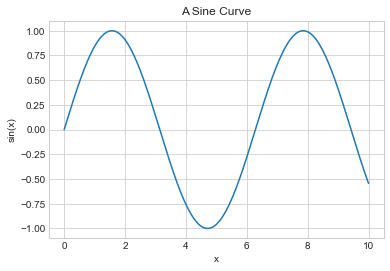

In [18]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

* 要畫 legend 的話，簡單的做法，是在每張圖上先幫他加上 label，最後再用 `plt.legend()`，他就會幫你做出來：

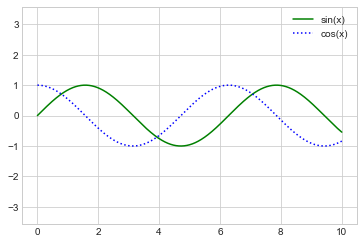

In [19]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

## Matplotlib的陷阱

* 儘管大部分的 `plt` functions 都可轉成 `ax` 的 methods (例如 `plt.plot()` → `ax.plot()`, `plt.legend()` → `ax.legend()`, etc.), 但不是全部的 plt function 都可以這樣轉成 ax 的 method. 
* 尤其是這章教的 limits, labels, and titles 名稱就有些微不同. 

- `plt.xlabel()`  → `ax.set_xlabel()`
- `plt.ylabel()` → `ax.set_ylabel()`
- `plt.xlim()`  → `ax.set_xlim()`
- `plt.ylim()` → `ax.set_ylim()`
- `plt.title()` → `ax.set_title()`

* 但其實用 oop 介面來畫圖時，很少直接 call 上面那些 methods，而是直接用`ax.set()` 把該設定的 properties 一次設定完：

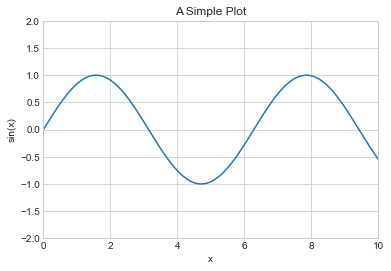

In [20]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(
    xlim=(0, 10), 
    ylim=(-2, 2),
    xlabel='x', 
    ylabel='sin(x)',
    title='A Simple Plot'
);